Following https://www.youtube.com/watch?v=i_LwzRVP7bg&list=WL tutorial

In [109]:
import pandas as pd
import numpy as np
import os
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
# %matplotlib inline

# Dataset Information
## Additional Information

The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere. This Cherenkov radiation (of visible to UV wavelengths) leaks through the atmosphere and gets recorded in the detector, allowing reconstruction of the shower parameters. The available information consists of pulses left by the incoming Cherenkov photons on the photomultiplier tubes, arranged in a plane, the camera. Depending on the energy of the primary gamma, a total of few hundreds to some 10000 Cherenkov photons get collected, in patterns (called the shower image), allowing to discriminate statistically those caused by primary gammas (signal) from the images of hadronic showers initiated by cosmic rays in the upper atmosphere (background).

Typically, the image of a shower after some pre-processing is an elongated cluster. Its long axis is oriented towards the camera center if the shower axis is parallel to the telescope's optical axis, i.e. if the telescope axis is directed towards a point source. A principal component analysis is performed in the camera plane, which results in a correlation axis and defines an ellipse. If the depositions were distributed as a bivariate Gaussian, this would be an equidensity ellipse. The characteristic parameters of this ellipse (often called Hillas parameters) are among the image parameters that can be used for discrimination. The energy depositions are typically asymmetric along the major axis, and this asymmetry can also be used in discrimination. There are, in addition, further discriminating characteristics, like the extent of the cluster in the image plane, or the total sum of depositions.

The data set was generated by a Monte Carlo program, Corsika, described in:
    D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers,
    Forschungszentrum Karlsruhe FZKA 6019 (1998).
http://rexa.info/paper?id=ac6e674e9af20979b23d3ed4521f1570765e8d68

The program was run with parameters allowing to observe events with energies down to below 50 GeV.

Has Missing Values?
No

Bock, R. (2004). MAGIC Gamma Telescope [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C52C8B.

In [110]:
#read df
input_file="magic_gamma_telescope/magic04.data"
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv(input_file, names=cols)
print("Data :", df)

#convert class
print("Class before converting :", df["class"].unique())
df["class"] = (df["class"] == "g").astype(int)
print("Class after converting :", df["class"].unique())

Data :         fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist class  
0       -8.2027  40.0920   81.8828     g  
1       -9.9574   6.3609  205.

## features visualisation

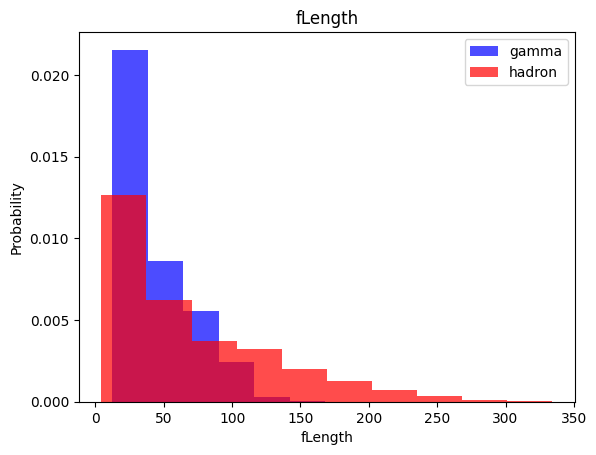

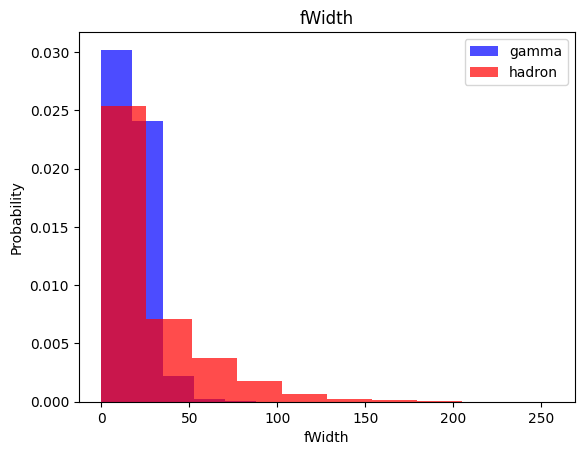

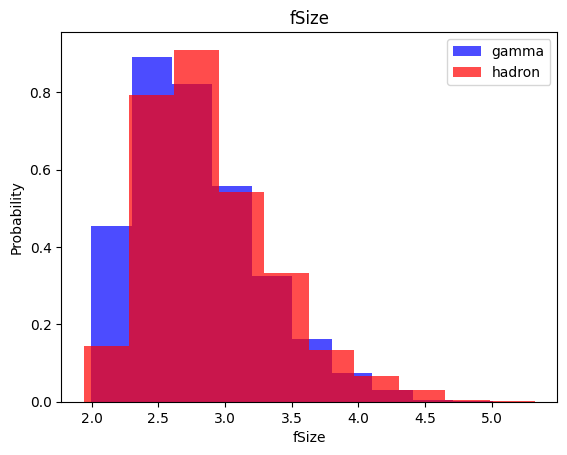

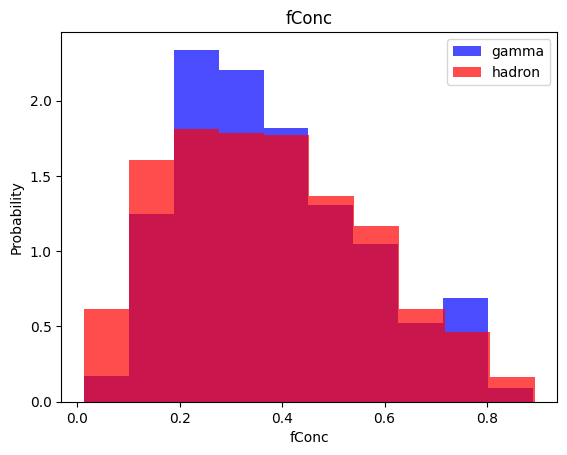

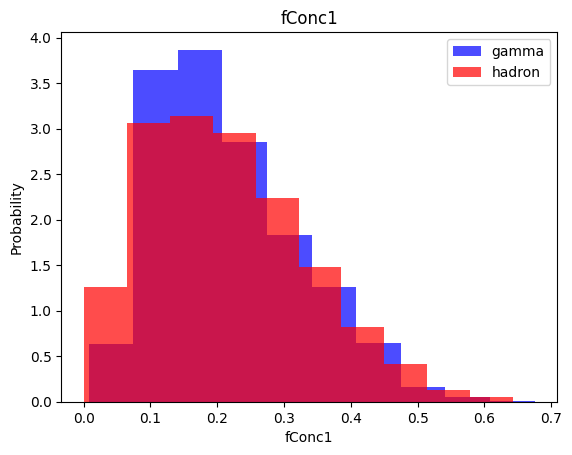

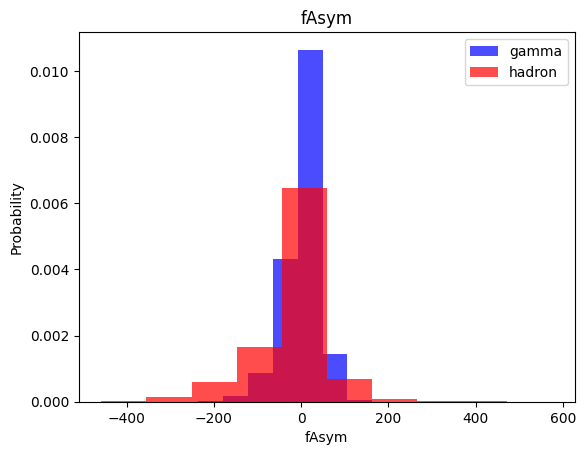

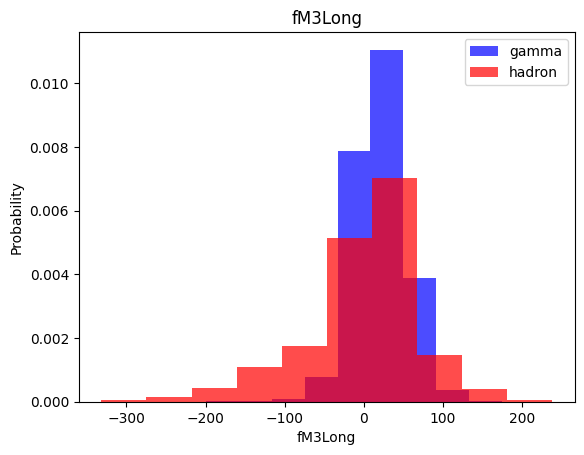

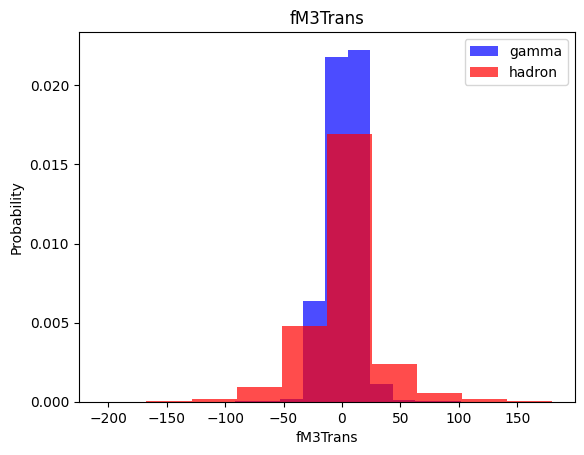

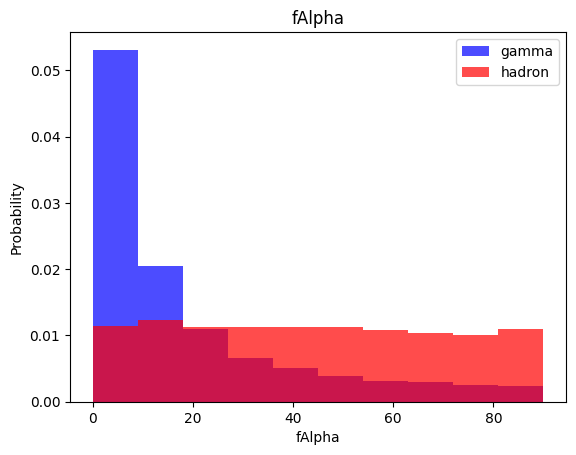

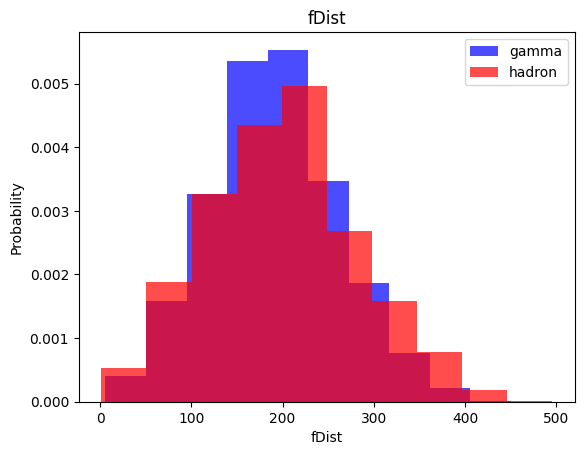

In [111]:
for label in cols[:-1] :
    plt.hist(df[df["class"]==1][label], color="blue", label="gamma", alpha=0.7, density=True)
    plt.hist(df[df["class"]==0][label], color="red", label="hadron", alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Split the data

In [112]:
# shuffling with df.sample, splitting with np.split with cut defined in the list : from 0 to 60% of the len of the 
# dataset, it will be in train, from 60% to 80% it will be in valid, from 80 to 100% it will be in test
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df)) ])

/opt/miniconda3/envs/env313/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


# Verify population
checking if there is a miss distribution of in the input dataset. The hadrons are underrepresented in the input dataset, so we have to oversample it to get the same number of samples. We use imblearn

In [113]:
#function to scale the data properly
def scale_dataset(dataframe, oversample=False) :
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample :
        ros = RandomOverSampler()
        X,y = ros.fit_resample(X,y)

    data = np.hstack((X, np.reshape(y, (-1,1))))
    return data, X, y

In [114]:
print("hadrons train dataset len", len(train[train["class"] == 0]))
print("gamma train dataset len", len(train[train["class"] == 1]))

hadrons train dataset len 4047
gamma train dataset len 7365


In [115]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False) #don't over sample for valid and test
test, X_test, y_test = scale_dataset(test, oversample=False)

In [116]:
#now the train dataset is balanced!
print("len of the train dataset is now :",len(y_train))
print("len of the train gamma :", sum(y_train == 1))
print("len of the train gamma :", sum(y_train == 0))

len of the train dataset is now : 14730
len of the train gamma : 7365
len of the train gamma : 7365


# K-NearestNeighbors (KNN)
Fitting with a KNN

In [117]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [118]:
knn_model = KNeighborsClassifier(n_neighbors=i)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76      1388
           1       0.85      0.88      0.86      2416

    accuracy                           0.83      3804
   macro avg       0.81      0.81      0.81      3804
weighted avg       0.82      0.83      0.82      3804



# Naive Bayes
Fitting with a naive bayes

In [119]:
from sklearn.naive_bayes import GaussianNB

In [120]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
y_pred = nb_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.41      0.51      1388
           1       0.72      0.89      0.80      2416

    accuracy                           0.71      3804
   macro avg       0.70      0.65      0.65      3804
weighted avg       0.70      0.71      0.69      3804



# Log regression

In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
lg_model = LogisticRegression()
lg_model.fit(X_train,y_train)
y_pred = lg_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1388
           1       0.83      0.82      0.82      2416

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



# Support vector machine (SVM)
Warning : SVM are not the best model in case there are outliers in the dataset.


May use the "kernel trick" that is squaring a feature and plotting it against its none squared.

In [123]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1388
           1       0.88      0.89      0.89      2416

    accuracy                           0.85      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.85      0.85      0.85      3804



# Neural net (NN)
activation function : sigmoid = 0 to 1 ; tanh = -1 to 1 ; relu = 0 when <0 or linear when > 0

In [124]:
import tensorflow as tf

In [125]:
def plot_history(history) :
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)
    
    plt.show()

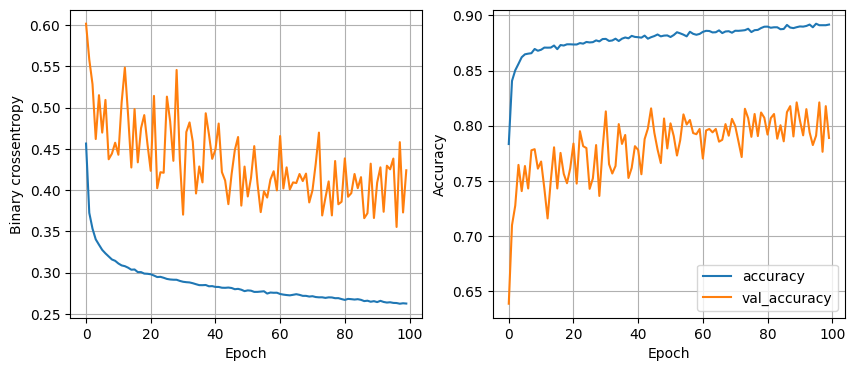

In [126]:
#without grid_search
nn_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(10,),),
    tf.keras.layers.Dense(32, activation="relu",),
    tf.keras.layers.Dense(32, activation="relu",),
    tf.keras.layers.Dense(1, activation="sigmoid",),
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss="binary_crossentropy",
                metrics=["accuracy"])

history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=False)

plot_history(history)

16 nodes, dropout 0, learning rate 0.01, batch_size 32


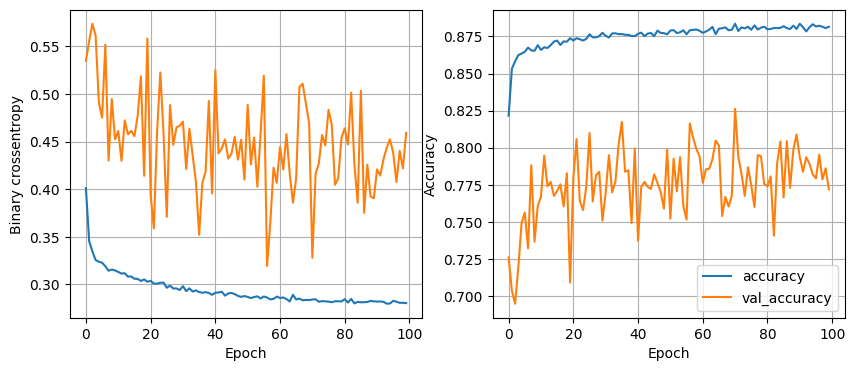

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8696 - loss: 0.3289
16 nodes, dropout 0, learning rate 0.01, batch_size 64


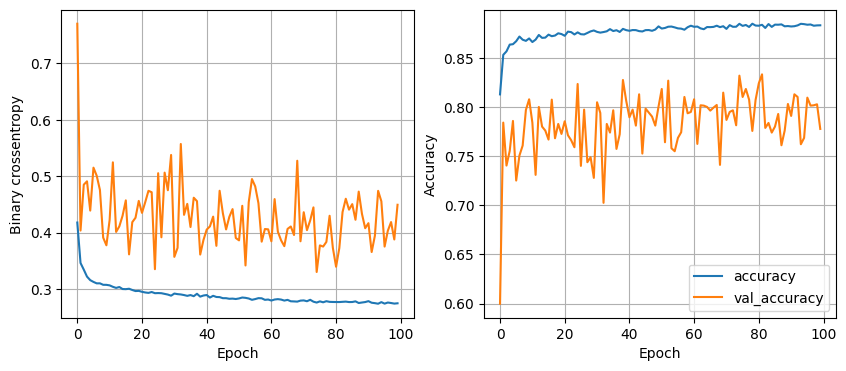

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8733 - loss: 0.3303
16 nodes, dropout 0, learning rate 0.01, batch_size 128


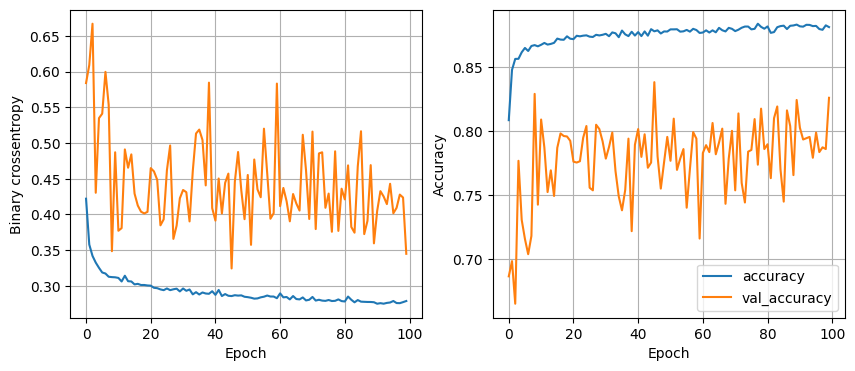

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8617 - loss: 0.3429
16 nodes, dropout 0, learning rate 0.005, batch_size 32


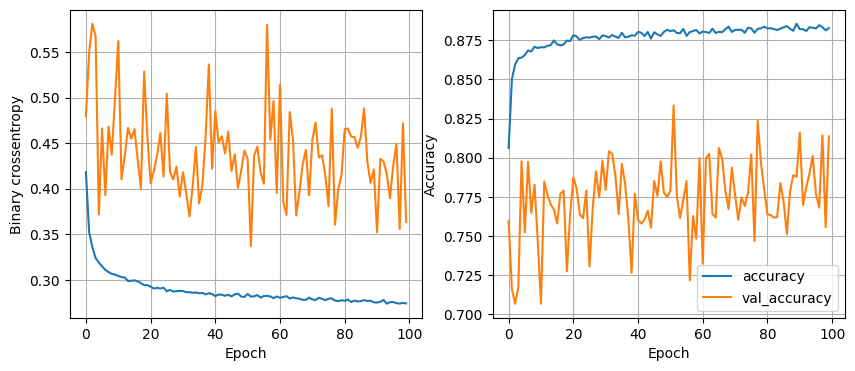

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8625 - loss: 0.3549
16 nodes, dropout 0, learning rate 0.005, batch_size 64


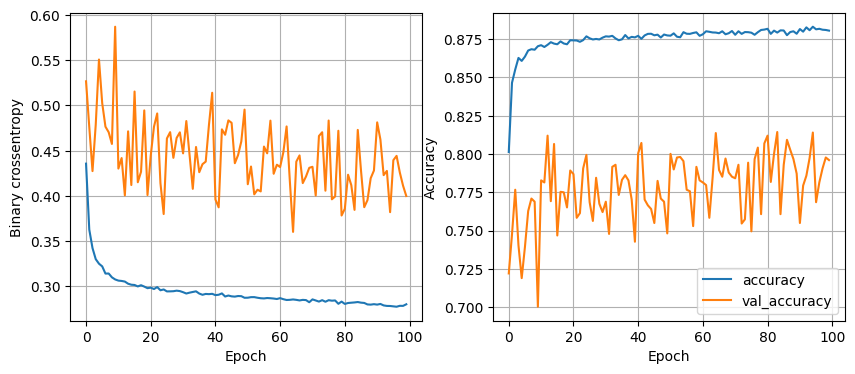

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8657 - loss: 0.3241
16 nodes, dropout 0, learning rate 0.005, batch_size 128


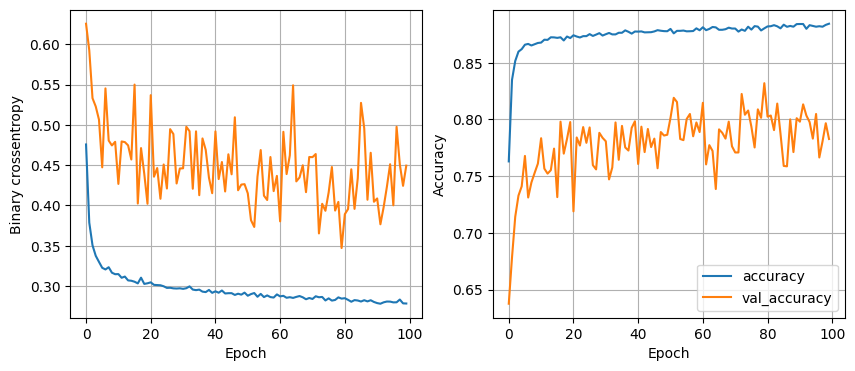

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8688 - loss: 0.3208
16 nodes, dropout 0, learning rate 0.001, batch_size 32


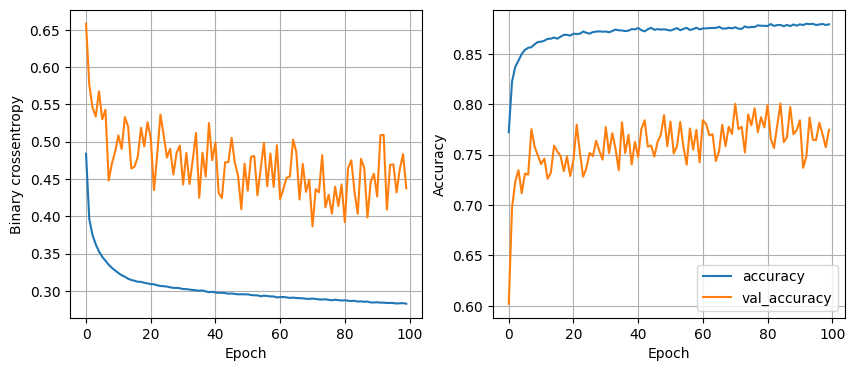

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8670 - loss: 0.3236
16 nodes, dropout 0, learning rate 0.001, batch_size 64


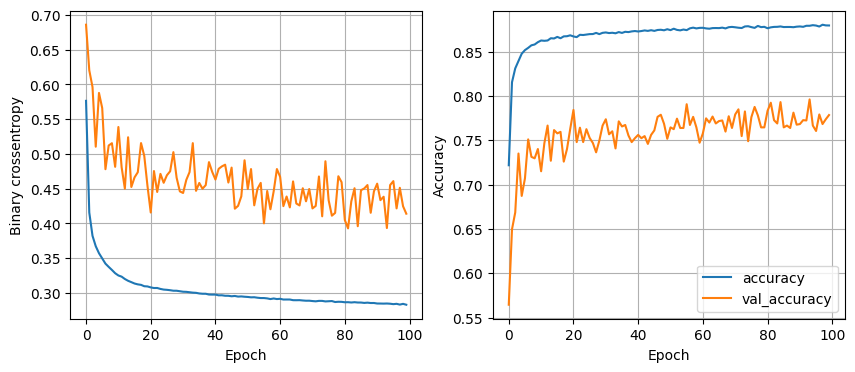

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8641 - loss: 0.3207
16 nodes, dropout 0, learning rate 0.001, batch_size 128


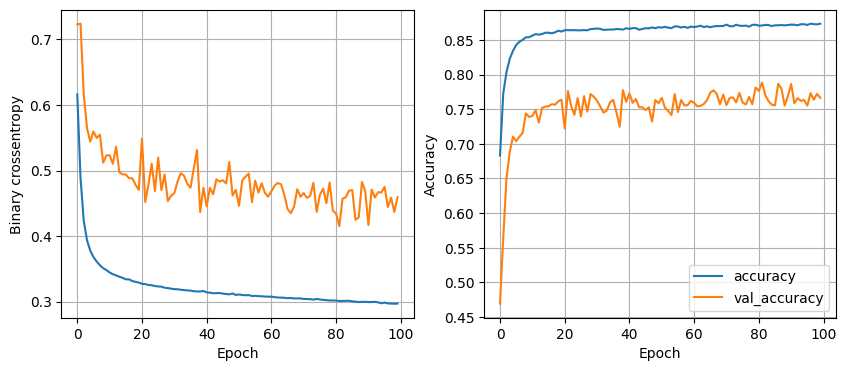

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8659 - loss: 0.3251
16 nodes, dropout 0.2, learning rate 0.01, batch_size 32


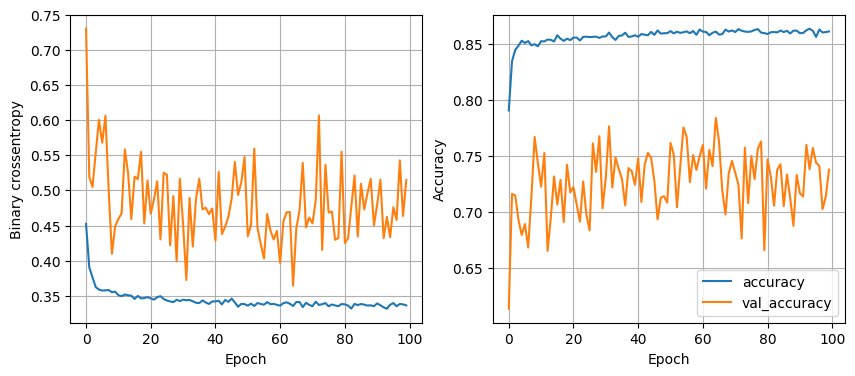

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8746 - loss: 0.3202
16 nodes, dropout 0.2, learning rate 0.01, batch_size 64


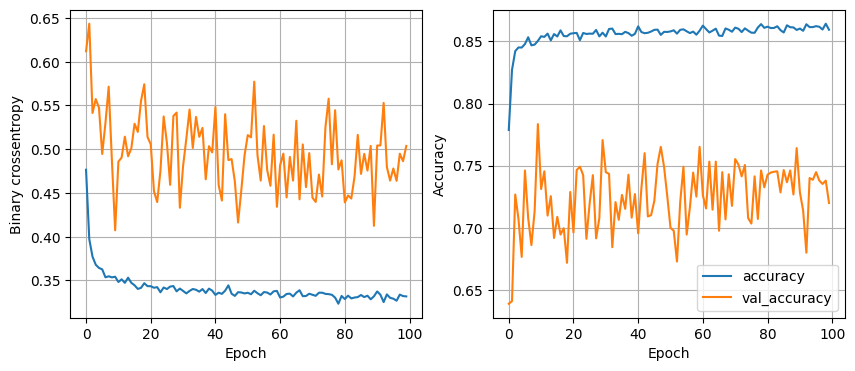

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8712 - loss: 0.3209
16 nodes, dropout 0.2, learning rate 0.01, batch_size 128


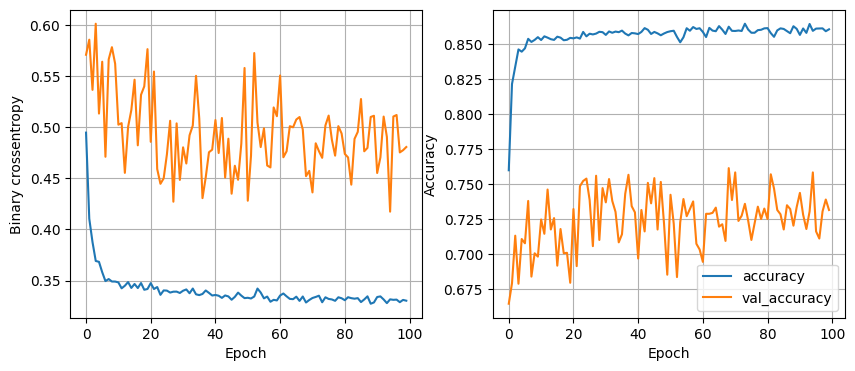

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8720 - loss: 0.3192
16 nodes, dropout 0.2, learning rate 0.005, batch_size 32


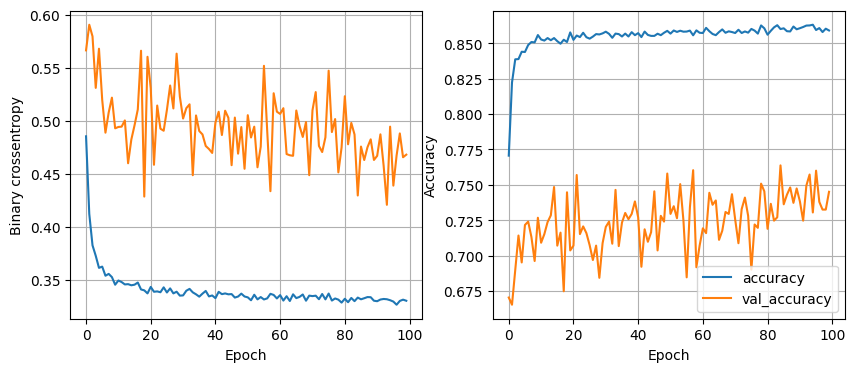

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8675 - loss: 0.3204
16 nodes, dropout 0.2, learning rate 0.005, batch_size 64


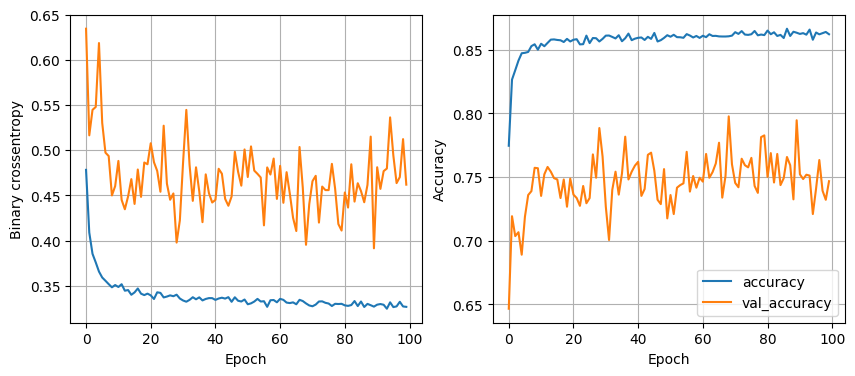

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8728 - loss: 0.3141
16 nodes, dropout 0.2, learning rate 0.005, batch_size 128


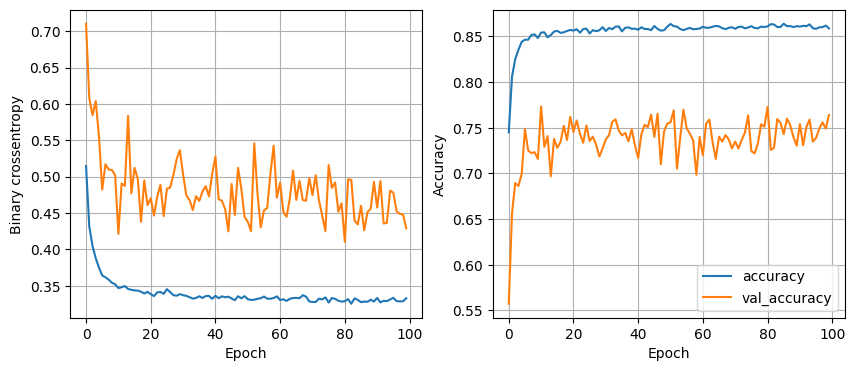

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8651 - loss: 0.3252
16 nodes, dropout 0.2, learning rate 0.001, batch_size 32


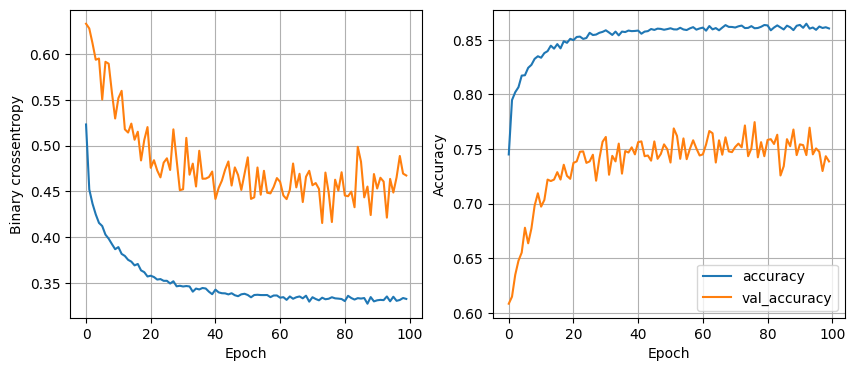

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8699 - loss: 0.3269
16 nodes, dropout 0.2, learning rate 0.001, batch_size 64


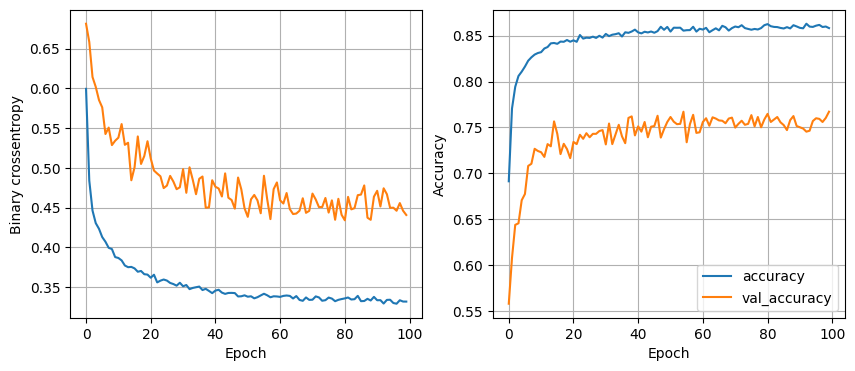

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8696 - loss: 0.3270
16 nodes, dropout 0.2, learning rate 0.001, batch_size 128


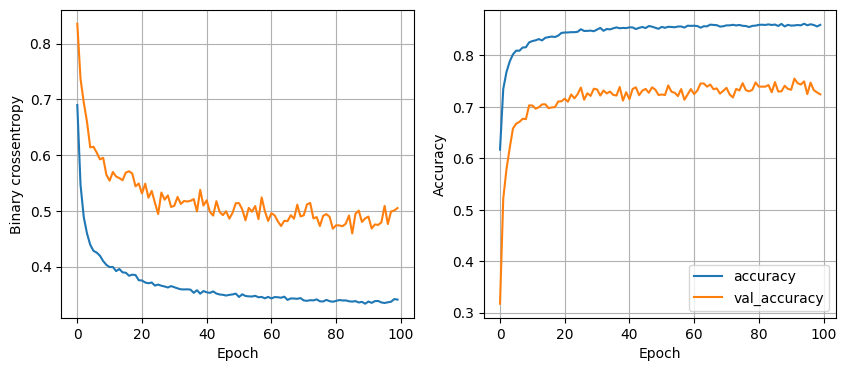

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8696 - loss: 0.3256
32 nodes, dropout 0, learning rate 0.01, batch_size 32


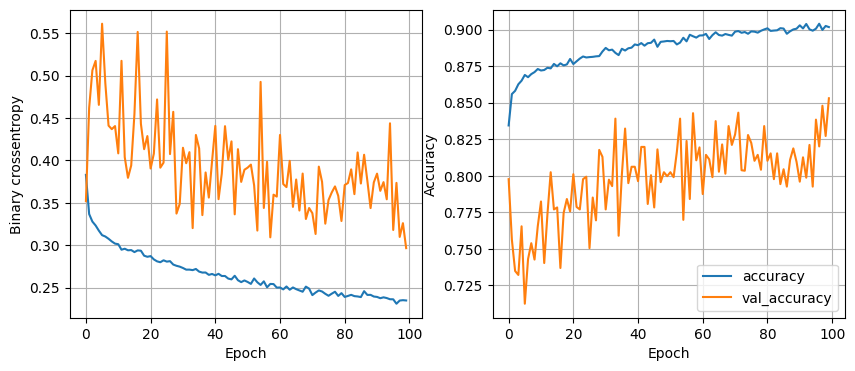

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8536 - loss: 0.4088
32 nodes, dropout 0, learning rate 0.01, batch_size 64


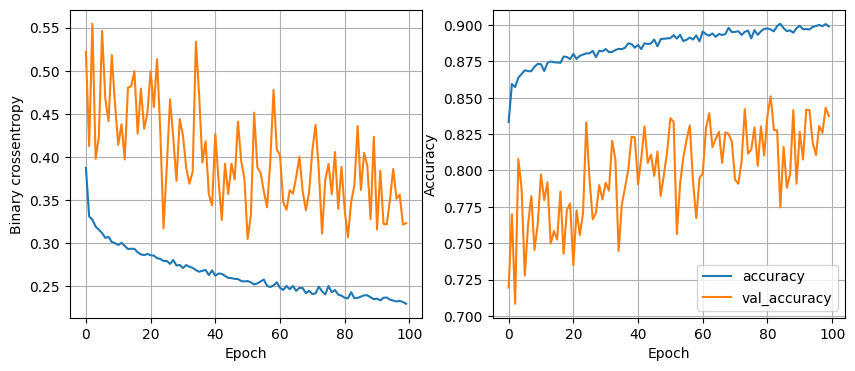

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8575 - loss: 0.4003
32 nodes, dropout 0, learning rate 0.01, batch_size 128


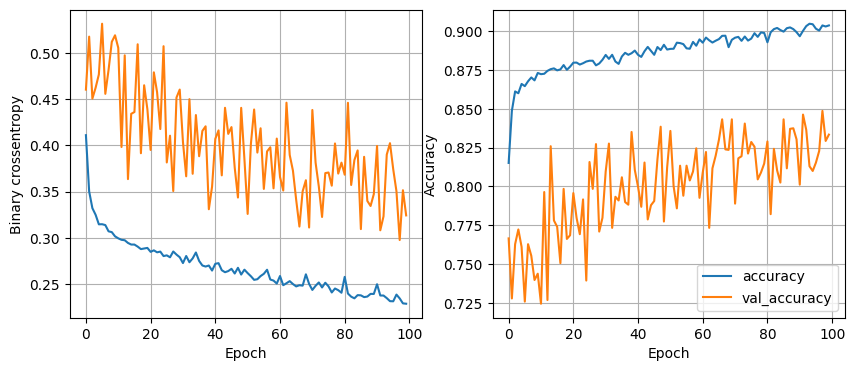

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8625 - loss: 0.3818
32 nodes, dropout 0, learning rate 0.005, batch_size 32


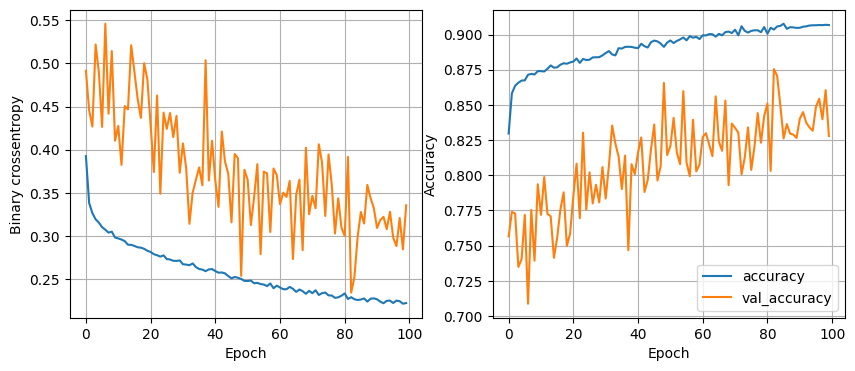

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8599 - loss: 0.4150
32 nodes, dropout 0, learning rate 0.005, batch_size 64


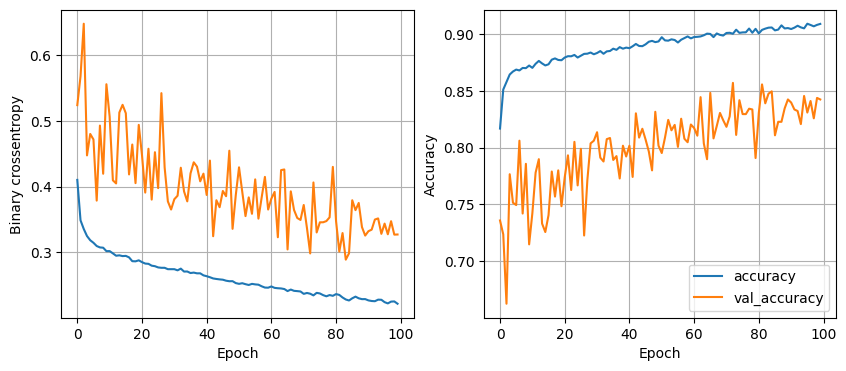

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8667 - loss: 0.3638
32 nodes, dropout 0, learning rate 0.005, batch_size 128


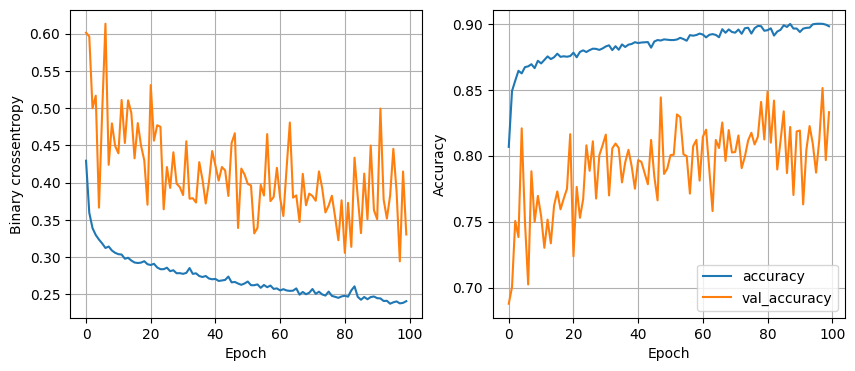

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8609 - loss: 0.3533
32 nodes, dropout 0, learning rate 0.001, batch_size 32


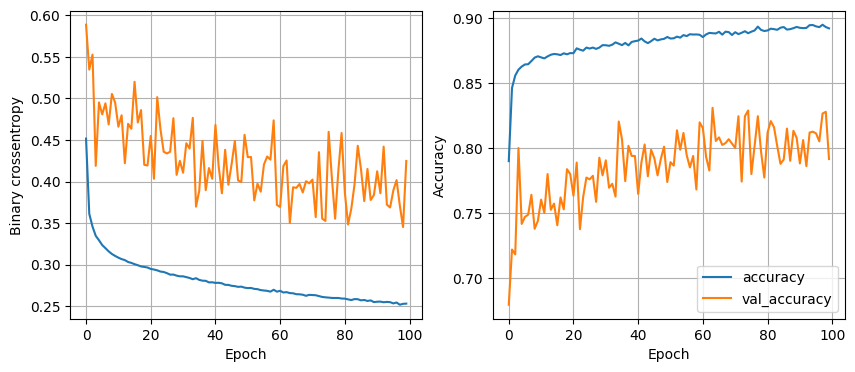

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8701 - loss: 0.3287
32 nodes, dropout 0, learning rate 0.001, batch_size 64


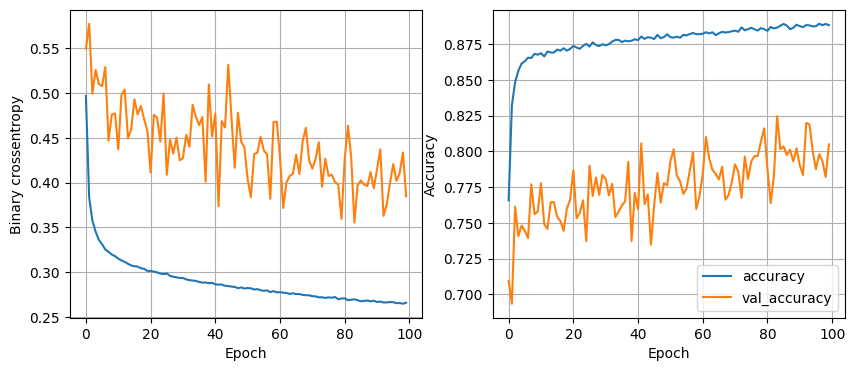

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8638 - loss: 0.3216
32 nodes, dropout 0, learning rate 0.001, batch_size 128


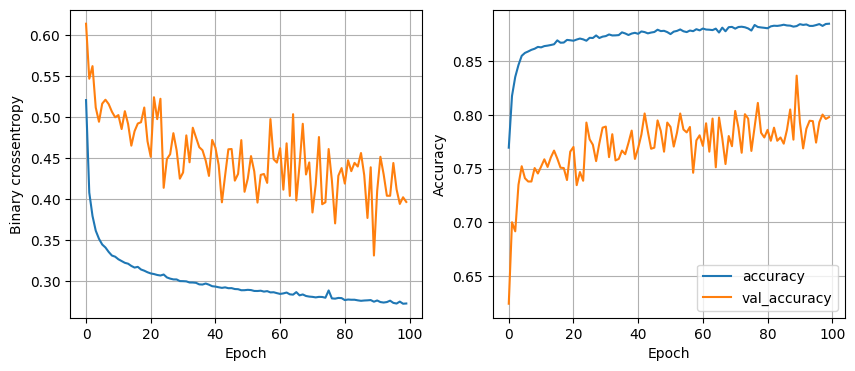

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8672 - loss: 0.3199
32 nodes, dropout 0.2, learning rate 0.01, batch_size 32


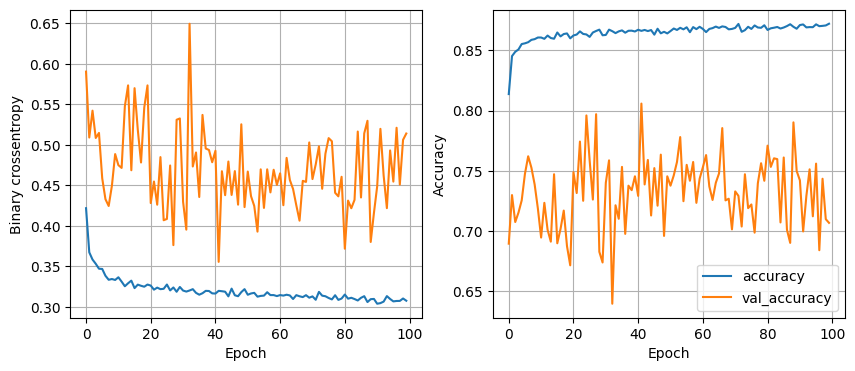

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8770 - loss: 0.3075
32 nodes, dropout 0.2, learning rate 0.01, batch_size 64


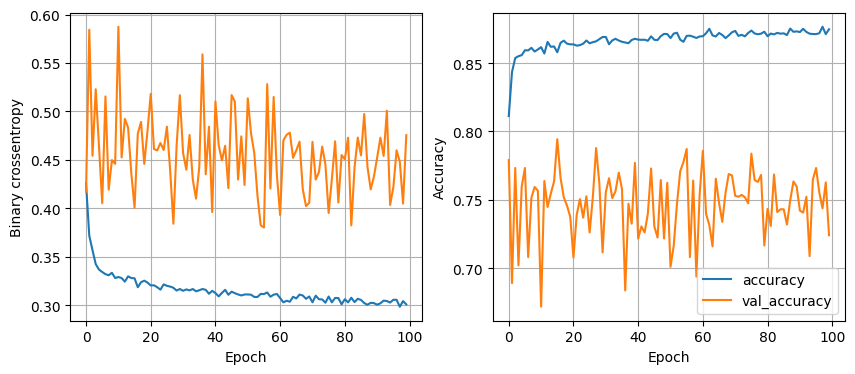

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8759 - loss: 0.3058
32 nodes, dropout 0.2, learning rate 0.01, batch_size 128


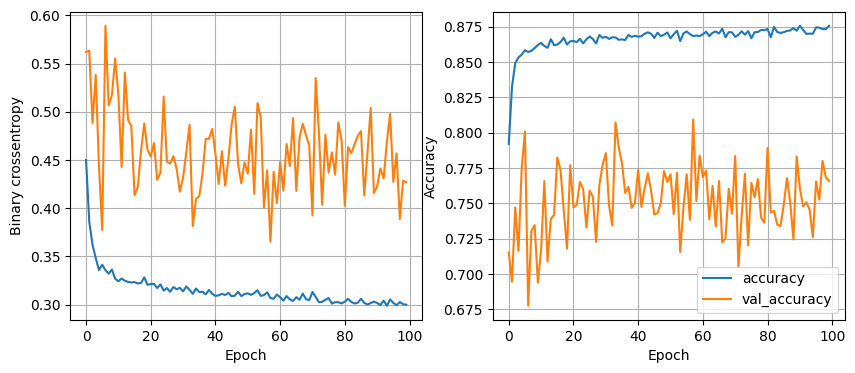

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8736 - loss: 0.3116
32 nodes, dropout 0.2, learning rate 0.005, batch_size 32


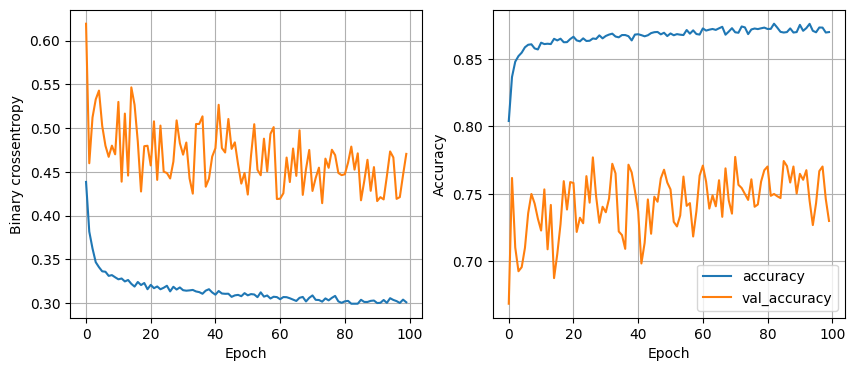

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8733 - loss: 0.3058
32 nodes, dropout 0.2, learning rate 0.005, batch_size 64


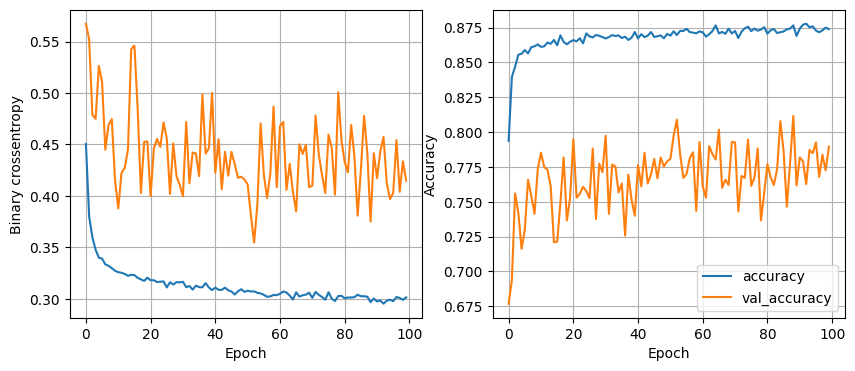

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8693 - loss: 0.3195
32 nodes, dropout 0.2, learning rate 0.005, batch_size 128


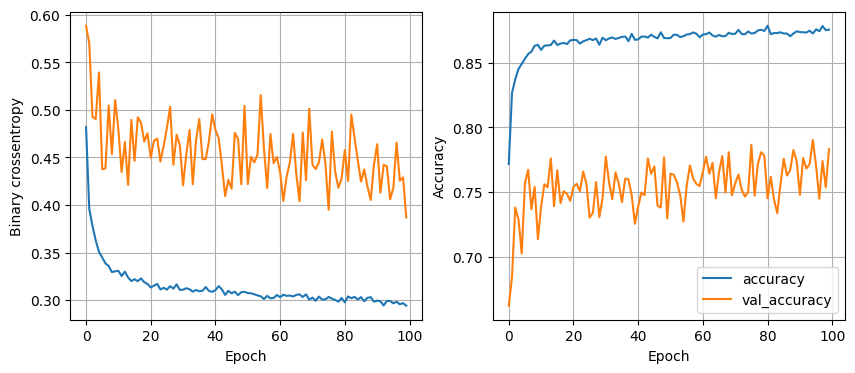

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8707 - loss: 0.3198
32 nodes, dropout 0.2, learning rate 0.001, batch_size 32


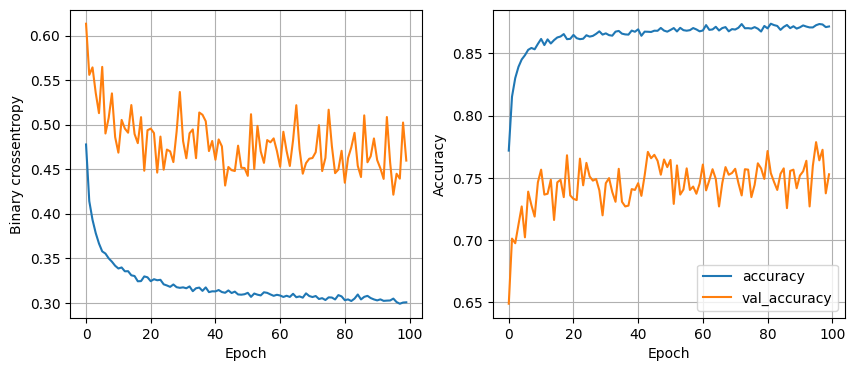

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8728 - loss: 0.3125
32 nodes, dropout 0.2, learning rate 0.001, batch_size 64


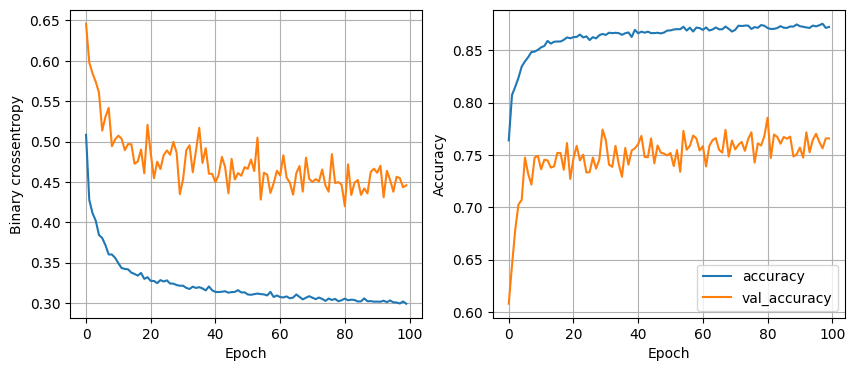

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8741 - loss: 0.3166
32 nodes, dropout 0.2, learning rate 0.001, batch_size 128


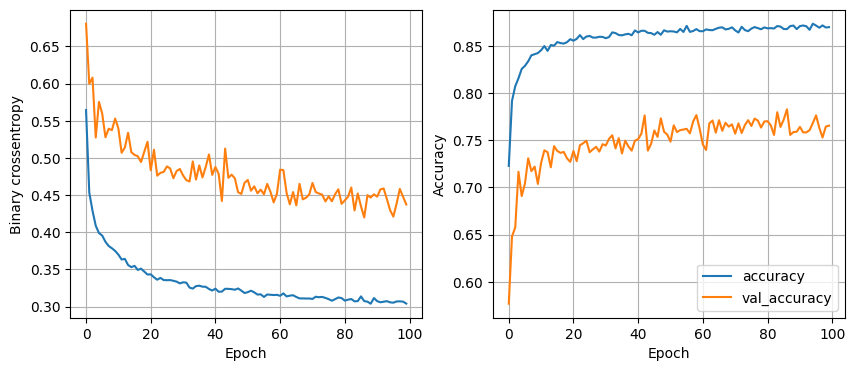

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8728 - loss: 0.3198
64 nodes, dropout 0, learning rate 0.01, batch_size 32


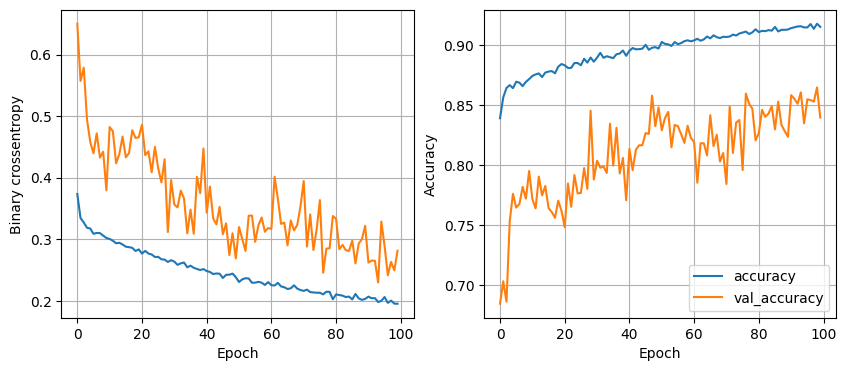

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8638 - loss: 0.4643
64 nodes, dropout 0, learning rate 0.01, batch_size 64


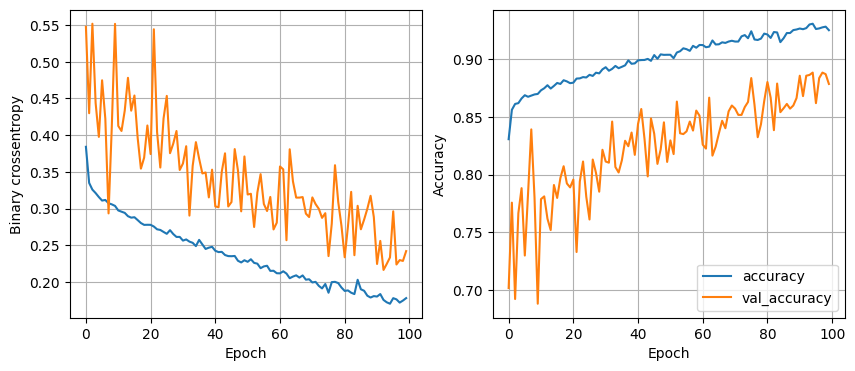

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8599 - loss: 0.5099
64 nodes, dropout 0, learning rate 0.01, batch_size 128


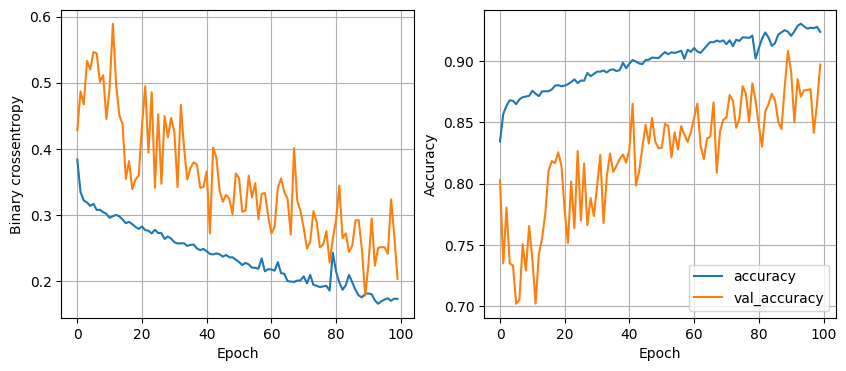

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8478 - loss: 0.5187
64 nodes, dropout 0, learning rate 0.005, batch_size 32


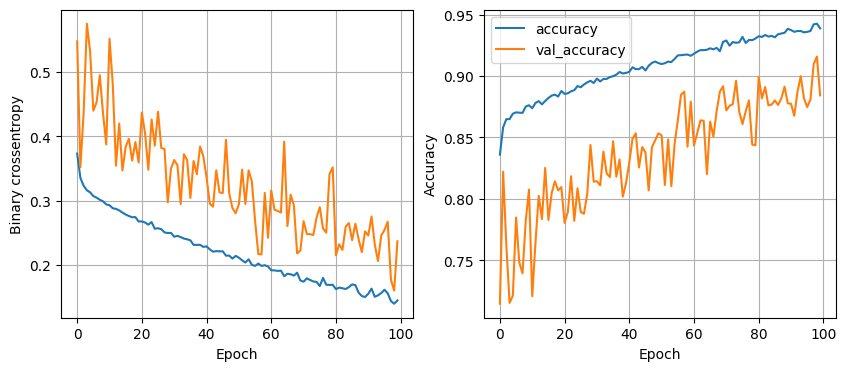

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8578 - loss: 0.6253
64 nodes, dropout 0, learning rate 0.005, batch_size 64


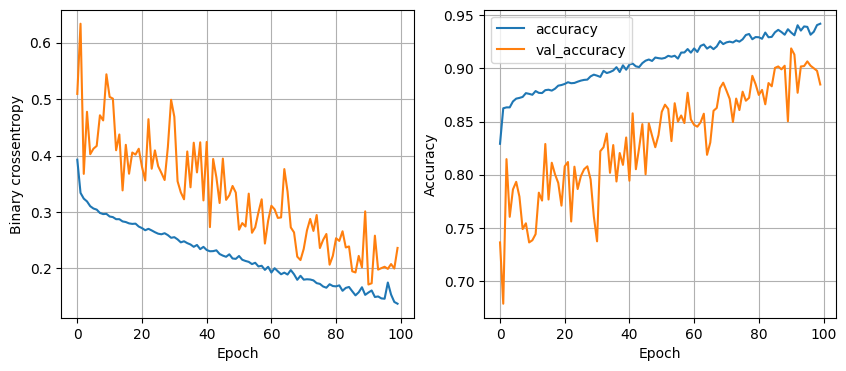

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8654 - loss: 0.5650
64 nodes, dropout 0, learning rate 0.005, batch_size 128


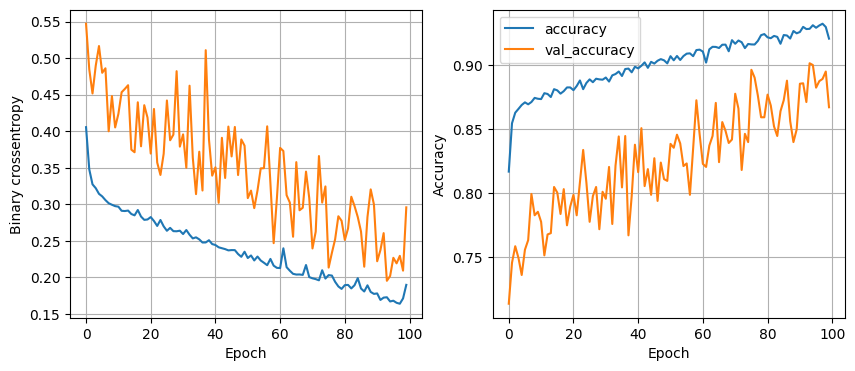

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8659 - loss: 0.4361
64 nodes, dropout 0, learning rate 0.001, batch_size 32


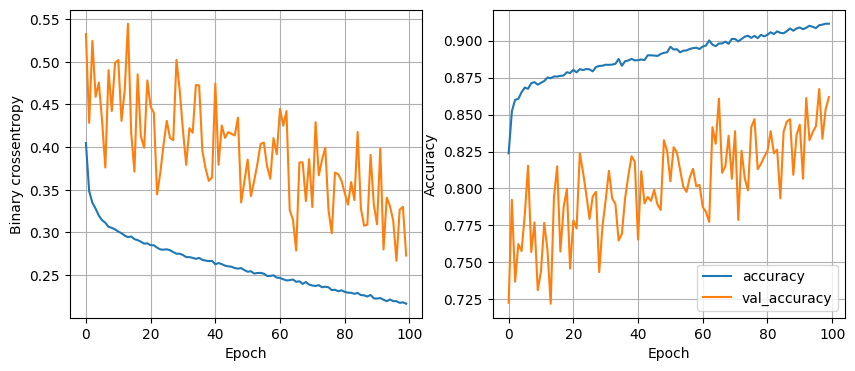

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8554 - loss: 0.3870
64 nodes, dropout 0, learning rate 0.001, batch_size 64


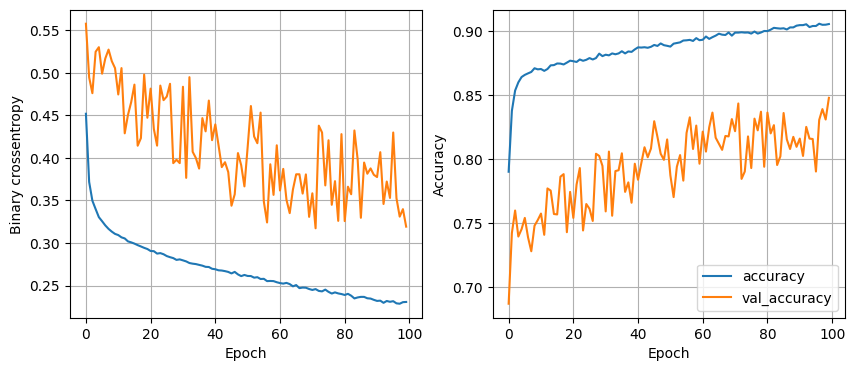

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8630 - loss: 0.3459
64 nodes, dropout 0, learning rate 0.001, batch_size 128


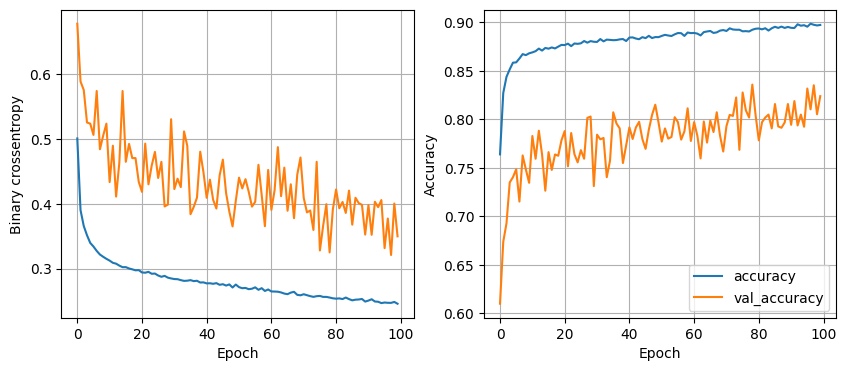

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8638 - loss: 0.3323
64 nodes, dropout 0.2, learning rate 0.01, batch_size 32


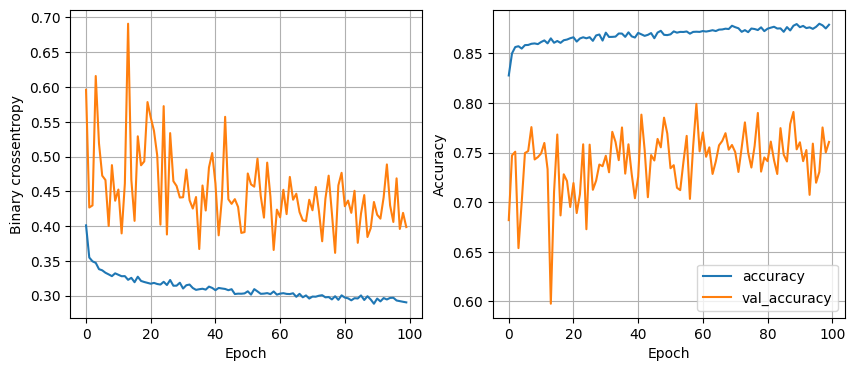

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8812 - loss: 0.3210
64 nodes, dropout 0.2, learning rate 0.01, batch_size 64


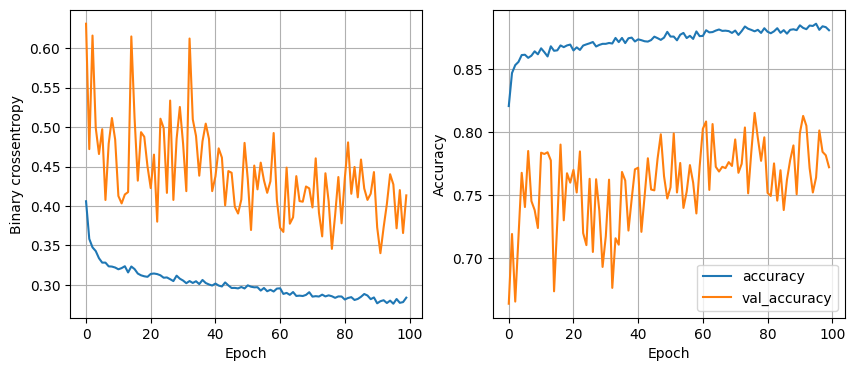

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8785 - loss: 0.3186
64 nodes, dropout 0.2, learning rate 0.01, batch_size 128


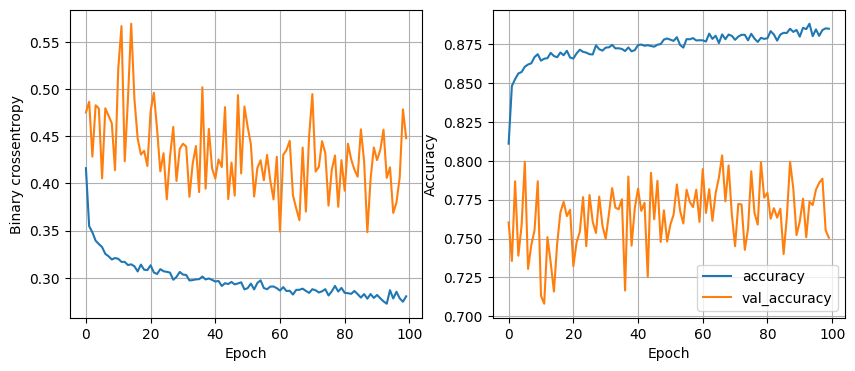

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8715 - loss: 0.3102
64 nodes, dropout 0.2, learning rate 0.005, batch_size 32


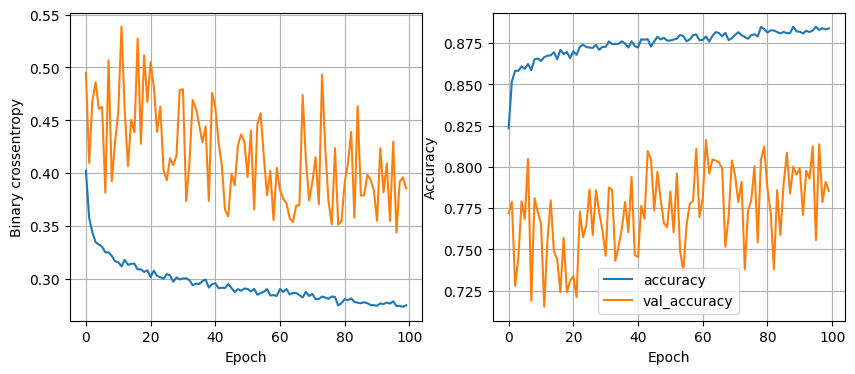

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8793 - loss: 0.3119
64 nodes, dropout 0.2, learning rate 0.005, batch_size 64


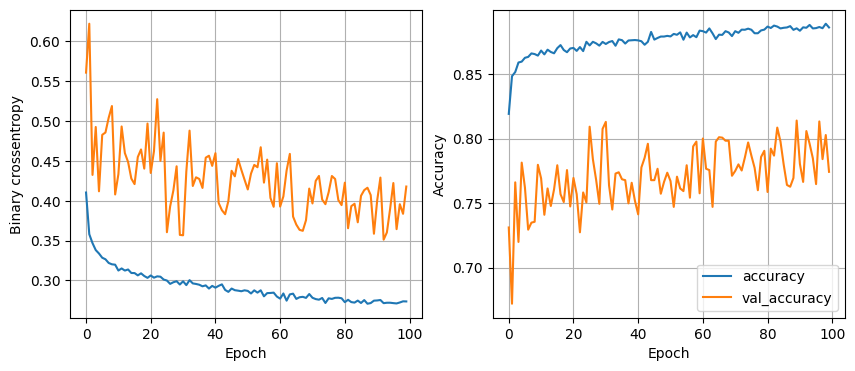

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8770 - loss: 0.3078
64 nodes, dropout 0.2, learning rate 0.005, batch_size 128


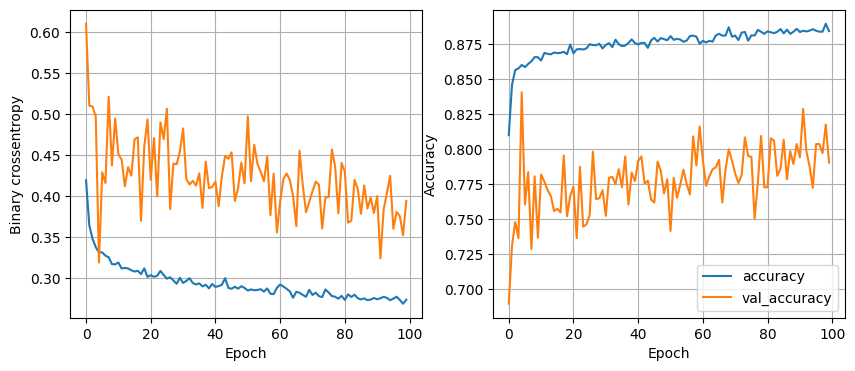

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8817 - loss: 0.3039
64 nodes, dropout 0.2, learning rate 0.001, batch_size 32


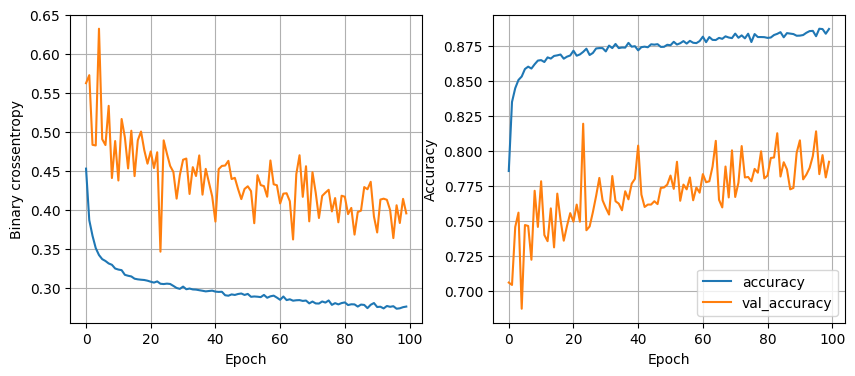

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8788 - loss: 0.3052
64 nodes, dropout 0.2, learning rate 0.001, batch_size 64


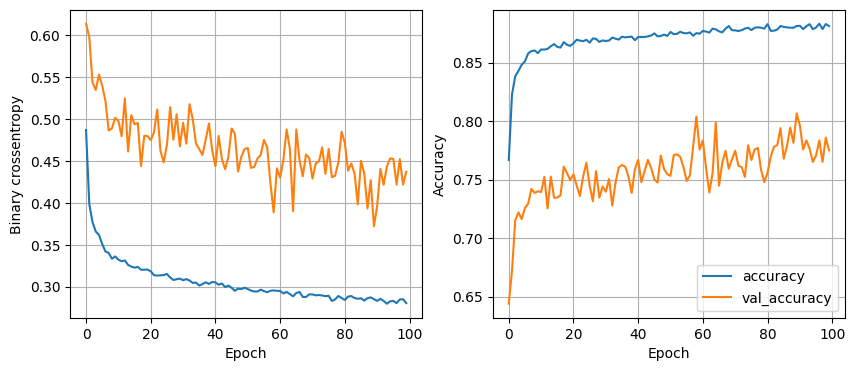

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8743 - loss: 0.3031
64 nodes, dropout 0.2, learning rate 0.001, batch_size 128


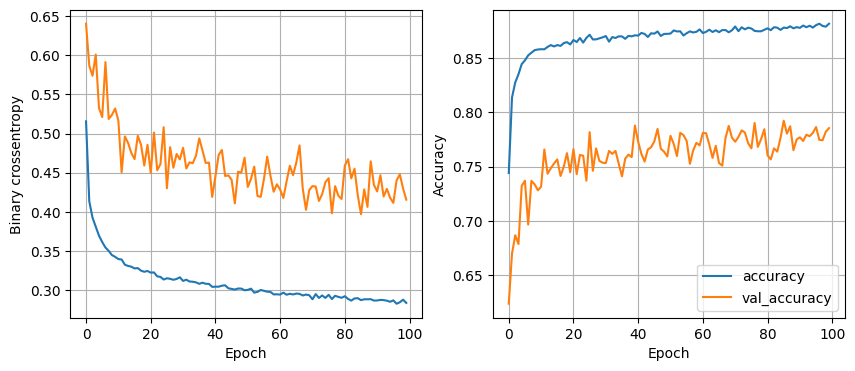

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8757 - loss: 0.3081


In [134]:
#with grid_search
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    """
    X_train : features to train the data
    y_train : output that the model as to predict
    num_nodes : number of nodes by layer
    dropout_prob : probability of the model to turn off a node during a training. Used to prevent the model to overfit
    lr : learning rate
    """
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(10,),),
        tf.keras.layers.Dense(num_nodes, activation="relu",),
        tf.keras.layers.Dropout(dropout_prob), #randomly choose certain nodes and don't train them
        tf.keras.layers.Dense(num_nodes, activation="relu",),
        tf.keras.layers.Dropout(dropout_prob), #randomly choose certain nodes and don't train them
        tf.keras.layers.Dense(1, activation="sigmoid",),
    ])
    
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss="binary_crossentropy",
                    metrics=["accuracy"])
    
    history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=False)
    #we can also pass the valid dataset in another parameter to replace the validation_split. look for something like a validation_data parameter.

    return nn_model, history

#initiate infinite value to track the best score for accuracy
least_val_loss = float("inf")
least_loss_model = None
#then loop over the grid search
epochs = 100
for num_nodes in [16,32,64] :
    for dropout_prob in [0,0.2] :
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128] :
                print(f"{num_nodes} nodes, dropout {dropout_prob}, learning rate {lr}, batch_size {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)[0]
                if val_loss < least_val_loss :
                    least_val_loss, least_loss_model = val_loss, model
                    

In [ ]:
y_pred = least_loss_model.predict(X_test) #because we used a sigmoid values are not 0 or 1 but floats between 0 and 1.
print(y_pred)

#because of that we are casting it to 0 and 1 with a condition
ypred = (y_pred > 0.5).astype(int)
print(y_pred)

# we now can reshape it so it become one dimensional
y_pred = y_pred.reshape(-1,)
print(classification_report(y_test,y_pred))